In [1]:
##
# Load libraries
import pandas as pd
from sqlalchemy import create_engine

# Create the database engine
engine = create_engine('sqlite:///data.db')

# Load hpd311calls without any SQL
hpd_calls = pd.read_sql('hpd311calls', engine)

# View the first few rows of data
(hpd_calls.head())

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN


In [2]:


##
# Create the database engine
engine = create_engine("sqlite:///data.db")

# Create a SQL query to load the entire weather table
query = """
SELECT *
  FROM weather;
"""

# Load weather with the SQL query
weather = pd.read_sql(query, engine)

# View the first few rows of data
(weather.head())

,station,name,latitude,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/01/2017,December,5.37,0.00,0.0,,52,42
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/02/2017,December,3.13,0.00,0.0,,48,39
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/03/2017,December,2.01,0.00,0.0,,48,42
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/04/2017,December,3.58,0.00,0.0,,51,40
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/05/2017,December,6.71,0.75,0.0,,61,50


In [3]:
# Create database engine for data.db
engine = create_engine('sqlite:///data.db')

# Write query to get date, tmax, and tmin from weather
query = """
SELECT date,
       tmax, 
       tmin
  FROM weather;
"""

# Make a data frame by passing query and engine to read_sql()
temperatures = pd.read_sql(query, engine)

# View the resulting data frame
(temperatures)

,date,tmax,tmin
0,12/01/2017,52,42
1,12/02/2017,48,39
2,12/03/2017,48,42
3,12/04/2017,51,40
4,12/05/2017,61,50
...,...,...,...
116,03/27/2018,47,34
117,03/28/2018,52,38
118,03/29/2018,53,49
119,03/30/2018,62,44


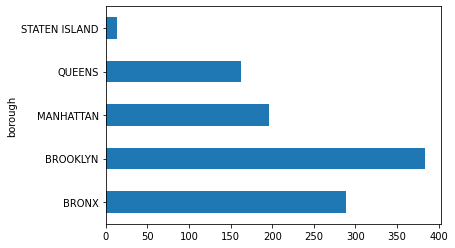

In [4]:
# Create query to get hpd311calls records about safety
import pandas as pd
import matplotlib.pyplot as plt
query = """
SELECT *
FROM hpd311calls
WHERE complaint_type = 'SAFETY';
"""

# Query the database and assign result to safety_calls
safety_calls = pd.read_sql(query, engine)

# Graph the number of safety calls by borough
call_counts = safety_calls.groupby('borough').unique_key.count()
call_counts.plot.barh()
plt.show()

In [5]:
# Create query for unique combinations of borough and complaint_type
query = """
SELECT DISTINCT borough,
       complaint_type
  FROM hpd311calls;
"""

# Load results of query to a data frame
issues_and_boros = pd.read_sql(query, engine)

# Check assumption about issues and boroughs
print(issues_and_boros)

          borough    complaint_type
0           BRONX    HEAT/HOT WATER
1       MANHATTAN          PLUMBING
2       MANHATTAN    HEAT/HOT WATER
3        BROOKLYN    HEAT/HOT WATER
4          QUEENS    HEAT/HOT WATER
..            ...               ...
60      MANHATTAN  OUTSIDE BUILDING
61      MANHATTAN          ELEVATOR
62       BROOKLYN  OUTSIDE BUILDING
63  STATEN ISLAND            SAFETY
64  STATEN ISLAND  OUTSIDE BUILDING

[65 rows x 2 columns]


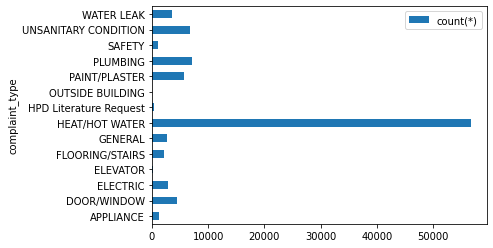

In [6]:
# Create query to get call counts by complaint_type
query = """
SELECT DISTINCT complaint_type,
     count(*)
  FROM hpd311calls
  GROUP BY complaint_type;
"""

# Create data frame of call counts by issue
calls_by_issue = pd.read_sql(query, engine)

# Graph the number of calls for each housing issue
calls_by_issue.plot.barh(x="complaint_type")
plt.show()

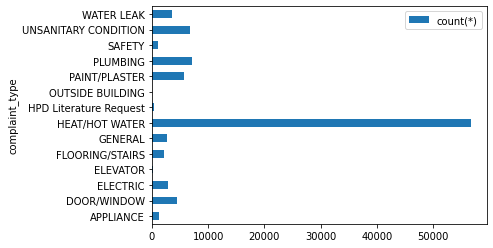

In [7]:
# Create query to get call counts by complaint_type
query = """
SELECT DISTINCT complaint_type,
     count(*)
  FROM hpd311calls
  GROUP BY complaint_type;
"""

# Create data frame of call counts by issue
calls_by_issue = pd.read_sql(query, engine)

# Graph the number of calls for each housing issue
calls_by_issue.plot.barh(x="complaint_type")
plt.show()

In [11]:
# Create query to get temperature and precipitation by month
query = """
SELECT month, 
        MAX(tmax), 
        MIN(tmin),
        SUM(prcp)
  FROM weather 
 GROUP BY month;
"""

# Get data frame of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)  MIN(tmin)  SUM(prcp)
0  December         61          9       2.21
1  February         78         16       5.83
2   January         61          5       2.18
3     March         62         27       5.17


In [12]:
# Query to join weather to call records by date columns
query = """
SELECT * 
  FROM hpd311calls
  JOIN weather
  ON hpd311calls.created_date = weather.date;
"""

# Create data frame of joined tables
calls_with_weather = pd.read_sql(query, engine)

# View the data frame to make sure all columns were joined
(calls_with_weather.head())

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,station,name,...,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7


In [13]:
##
# Query to get hpd311calls and precipitation values
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
  ON hpd311calls.created_date = weather.date;"""

# Load query results into the leak_calls data frame
leak_calls = pd.read_sql(query, engine)

# View the data frame
print(leak_calls.head())

##
# Query to get water leak calls and daily precipitation
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
    ON hpd311calls.created_date = weather.date
  WHERE hpd311calls.complaint_type = 'WATER LEAK';"""

# Load query results into the leak_calls data frame
leak_calls = pd.read_sql(query, engine)

# View the data frame
print(leak_calls.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough  prcp  
0    2786 JEROME AVENUE        07 BRONX      BRONX   0.0  
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN   0.0  
2  1235 GRAND CONCOURSE        04 BRONX      BRONX   0.0  
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN   0.0  
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN   0.0  
  unique_key created_date agency complaint_type incident_zip  \
0   38074305   01/01/2018    HPD     WATER LEAK        11212   
1   38078748   01/01/2018    HPD     WATER LEAK        10458   
2   38081097   01/01/2018    HPD     WATER LEAK        11221   

In [14]:
# Modify query to join tmax and tmin from weather by date
query = """
SELECT hpd311calls.created_date, 
	   COUNT(*), 
       weather.tmax,
       weather.tmin
  FROM hpd311calls 
       JOIN weather
       ON hpd311calls.created_date = weather.date
 WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER' 
 GROUP BY hpd311calls.created_date;
 """

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
print(df.head())

  created_date  COUNT(*)  tmax  tmin
0   01/01/2018      4597    19     7
1   01/02/2018      4362    26    13
2   01/03/2018      3045    30    16
3   01/04/2018      3374    29    19
4   01/05/2018      4333    19     9
